# House Price Assignment - Advanced Regression

# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

### Business Objective
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.



----

----

## 1. Data Understanding

In [1]:
# Importing libraries required for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data for analysis
house_price = pd.read_csv('train.csv')

In [3]:
# Displaying some data
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Getting deatils about data
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
house_price.shape

(1460, 81)

In [6]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

##### Observation
1. There are 1460 rows and 81 columns in dataframe
2. These 81 columns comprises of both dimensions (categorical value) and measures (numeric value)
3. The dataset is not clean, i.e. consists of missing values as well

----

## 2. Data Cleaning

Replacing NA to respective values as per the data dict, since these values are not are the actual missing values.

In [7]:
# Replacing NA to No Alley Access
house_price['Alley'].replace({np.nan:'No Alley Access'},inplace=True)
100*(house_price['Alley'].value_counts()/house_price['Alley'].count())

No Alley Access    93.767123
Grvl                3.424658
Pave                2.808219
Name: Alley, dtype: float64

In [8]:
# As 93.8% of Alley is "No Alley access",so it can be considered as a single value attribute. so Dropping this column
house_price=house_price.drop(['Alley'],axis=1)

In [9]:
#Replacing NA to No Basement in BsmtQual access
house_price['BsmtQual'].replace({np.nan:'No Basement'},inplace=True)
print(100*(house_price['BsmtQual'].value_counts()/house_price['BsmtQual'].count()))
# Three levels can be combined as "Others" (Fa, No BAsement, Ex) so that we dont have much varaibles
house_price['BsmtQual'].replace({'Fa':'Others'},inplace=True)
house_price['BsmtQual'].replace({'Ex':'Others'},inplace=True)
house_price['BsmtQual'].replace({'No Basement':'Others'},inplace=True)
print(100*(house_price['BsmtQual'].value_counts()/house_price['BsmtQual'].count()))

TA             44.452055
Gd             42.328767
Ex              8.287671
No Basement     2.534247
Fa              2.397260
Name: BsmtQual, dtype: float64
TA        44.452055
Gd        42.328767
Others    13.219178
Name: BsmtQual, dtype: float64


In [10]:
#Replacing NA to No Basement in BsmtCond
house_price['BsmtCond'].replace({np.nan:'No Basement'},inplace=True)
100*(house_price['BsmtCond'].value_counts()/house_price['BsmtCond'].count())
# Three levels of fair/good quality can be combined as OK  so that we dont have much columns
house_price['BsmtCond'].replace({'Fa':'OK'},inplace=True)
house_price['BsmtCond'].replace({'TA':'OK'},inplace=True)
house_price['BsmtCond'].replace({'Gd':'OK'},inplace=True)
# Two levels of poor quality can be combined as NOK (Po, No Basement) so that we dont have much columns
house_price['BsmtCond'].replace({'Po':'NOK'},inplace=True)
house_price['BsmtCond'].replace({'No Basement':'NOK'},inplace=True)
print(100*(house_price['BsmtCond'].value_counts()/house_price['BsmtCond'].count()))

OK     97.328767
NOK     2.671233
Name: BsmtCond, dtype: float64


In [11]:
#this column Can be considered as single value and can be dropped from dataset
house_price=house_price.drop(['BsmtCond'],axis=1)

In [12]:
#Replacing NA to No Basement in BsmtExposure column
house_price['BsmtExposure'].replace({np.nan:'No Basement'},inplace=True)
100*(house_price['BsmtExposure'].value_counts()/house_price['BsmtExposure'].count())

No             65.273973
Av             15.136986
Gd              9.178082
Mn              7.808219
No Basement     2.602740
Name: BsmtExposure, dtype: float64

In [13]:
#Replacing NA to No Basement in BsmtFinType1 column
house_price['BsmtFinType1'].replace({np.nan:'No Basement'},inplace=True)
100*(house_price['BsmtFinType1'].value_counts()/house_price['BsmtFinType1'].count())

Unf            29.452055
GLQ            28.630137
ALQ            15.068493
BLQ            10.136986
Rec             9.109589
LwQ             5.068493
No Basement     2.534247
Name: BsmtFinType1, dtype: float64

In [14]:
#Replacing NA to No Basement in BsmtFinType2 column
house_price['BsmtFinType2'].replace({np.nan:'No Basement'},inplace=True)
100*(house_price['BsmtFinType2'].value_counts()/house_price['BsmtFinType2'].count())

Unf            86.027397
Rec             3.698630
LwQ             3.150685
No Basement     2.602740
BLQ             2.260274
ALQ             1.301370
GLQ             0.958904
Name: BsmtFinType2, dtype: float64

In [15]:
#Checking  into the Basement related attributes to understand the correlations so that we can drop unwanted column
HouseAu_Basement=house_price[['BsmtQual','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
HouseAu_Basement.head()
HouseAu_Basement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
BsmtQual        1460 non-null object
BsmtExposure    1460 non-null object
BsmtFinType1    1460 non-null object
BsmtFinType2    1460 non-null object
BsmtFinSF1      1460 non-null int64
BsmtFinSF2      1460 non-null int64
BsmtUnfSF       1460 non-null int64
TotalBsmtSF     1460 non-null int64
dtypes: int64(4), object(4)
memory usage: 91.4+ KB


<Figure size 1440x720 with 0 Axes>

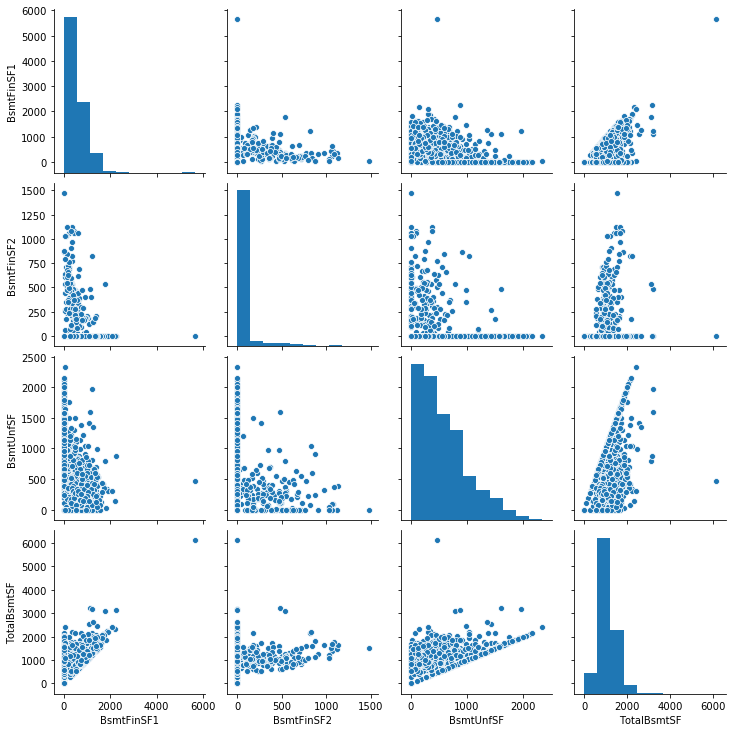

In [16]:
# pairwise scatter plot to draw the Basement attributes

plt.figure(figsize=(20, 10))
sns.pairplot(HouseAu_Basement)
plt.show()

In [17]:
#Dropping of correlated variables and keeping only TotalBsmtSF as this is the imp one remaining are related to it.
house_price=house_price.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)

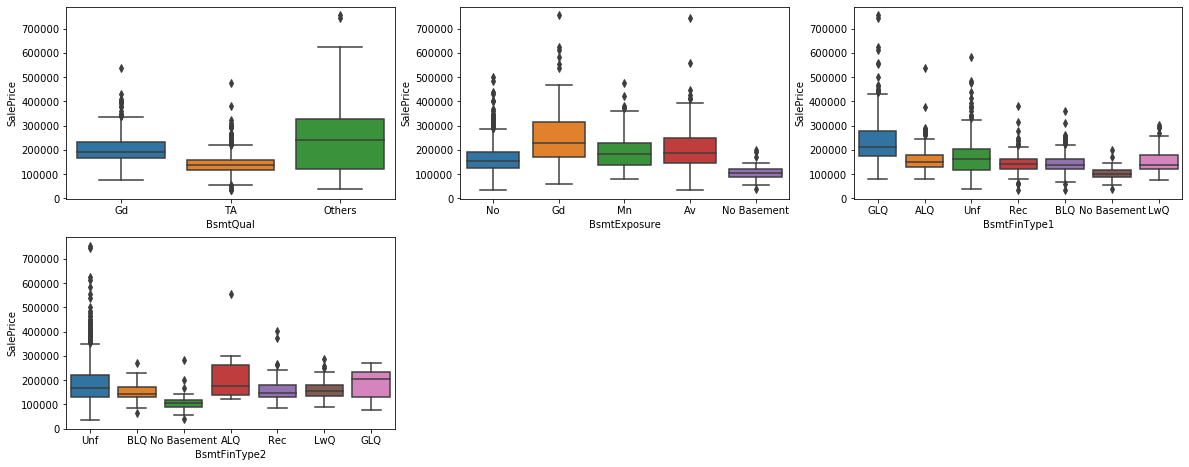

In [18]:
#Plotting the categorical variables related to Basement to find which ones have correlation and can be dropped
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = house_price)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = house_price)
plt.subplot(3,3,3)
sns.boxplot(x = 'BsmtFinType1',y = 'SalePrice', data = house_price)
plt.subplot(3,3,4)
sns.boxplot(x = 'BsmtFinType2',y = 'SalePrice', data = house_price)

In [19]:
#Dropping variables BsmtFinType1 and BsmtFinType2 as both do not showing a strong influence on sale price
house_price=house_price.drop(['BsmtFinType1','BsmtFinType2'],axis=1)

In [20]:
#Cleaning up variable FireplaceQu (Replacing NA to No Fireplace)
house_price['FireplaceQu'].replace({np.nan:'No Fireplace'},inplace=True)
print(100*(house_price['FireplaceQu'].value_counts()/house_price['FireplaceQu'].count()))
#Imputing level values of FireplaceQu so that we dont have much columns in the last
house_price['FireplaceQu'].replace({'Fa':'OK Fireplace'},inplace=True)
house_price['FireplaceQu'].replace({'TA':'OK Fireplace'},inplace=True)
house_price['FireplaceQu'].replace({'Gd':'OK Fireplace'},inplace=True)
house_price['FireplaceQu'].replace({'Ex':'OK Fireplace'},inplace=True)
house_price['FireplaceQu'].replace({'Po':'OK Fireplace'},inplace=True)
print(100*(house_price['FireplaceQu'].value_counts()/house_price['FireplaceQu'].count()))

No Fireplace    47.260274
Gd              26.027397
TA              21.438356
Fa               2.260274
Ex               1.643836
Po               1.369863
Name: FireplaceQu, dtype: float64
OK Fireplace    52.739726
No Fireplace    47.260274
Name: FireplaceQu, dtype: float64


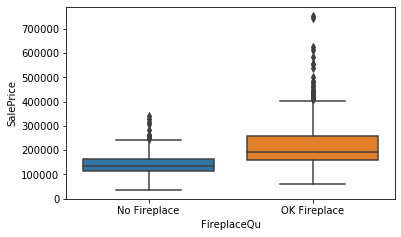

In [21]:
#Plotting the categorical variables related to FireplaceQu and checking correlation with SalePrice
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = house_price)
#Clearly we can see Fireplace  drives Sale price to some extent

In [22]:
#Cleaning variable GarageType (Replacing NA to No Garage)
house_price['GarageType'].replace({np.nan:'No Garage'},inplace=True)
100*(house_price['GarageType'].value_counts()/house_price['GarageType'].count())

Attchd       59.589041
Detchd       26.506849
BuiltIn       6.027397
No Garage     5.547945
Basment       1.301370
CarPort       0.616438
2Types        0.410959
Name: GarageType, dtype: float64

In [23]:
#Cleaning variable GarageFinish (Replacing NA to  No Garage)
house_price['GarageFinish'].replace({np.nan:'No Garage'},inplace=True)
100*(house_price['GarageFinish'].value_counts()/house_price['GarageFinish'].count())

Unf          41.438356
RFn          28.904110
Fin          24.109589
No Garage     5.547945
Name: GarageFinish, dtype: float64

In [24]:
#Cleaning variable GarageQual (Replacing NA to No Garage)
house_price['GarageQual'].replace({np.nan:'No Garage'},inplace=True)
print(100*(house_price['GarageQual'].value_counts()/house_price['GarageQual'].count()))
#Imputing level values of GarageQual so that we dont have much column in the last
house_price['GarageQual'].replace({'TA':'OK Garage'},inplace=True)
house_price['GarageQual'].replace({'Fa':'OK Garage'},inplace=True)
house_price['GarageQual'].replace({'Gd':'OK Garage'},inplace=True)
house_price['GarageQual'].replace({'Ex':'OK Garage'},inplace=True)
house_price['GarageQual'].replace({'Po':'No Garage'},inplace=True)
print(100*(house_price['GarageQual'].value_counts()/house_price['GarageQual'].count()))

TA           89.794521
No Garage     5.547945
Fa            3.287671
Gd            0.958904
Ex            0.205479
Po            0.205479
Name: GarageQual, dtype: float64
OK Garage    94.246575
No Garage     5.753425
Name: GarageQual, dtype: float64


In [25]:
#Cleaning variable GarageCond (Replacing NA to No Garage)
house_price['GarageCond'].replace({np.nan:'No Garage'},inplace=True)
print(100*(house_price['GarageCond'].value_counts()/house_price['GarageCond'].count()))
#Imputing level values of GarageCond reason is same as above
house_price['GarageCond'].replace({'TA':'OK'},inplace=True)
house_price['GarageCond'].replace({'Fa':'OK'},inplace=True)
house_price['GarageCond'].replace({'Gd':'OK'},inplace=True)
house_price['GarageCond'].replace({'Ex':'OK'},inplace=True)
house_price['GarageCond'].replace({'Po':'No Garage'},inplace=True)
print(100*(house_price['GarageCond'].value_counts()/house_price['GarageCond'].count()))

TA           90.821918
No Garage     5.547945
Fa            2.397260
Gd            0.616438
Po            0.479452
Ex            0.136986
Name: GarageCond, dtype: float64
OK           93.972603
No Garage     6.027397
Name: GarageCond, dtype: float64


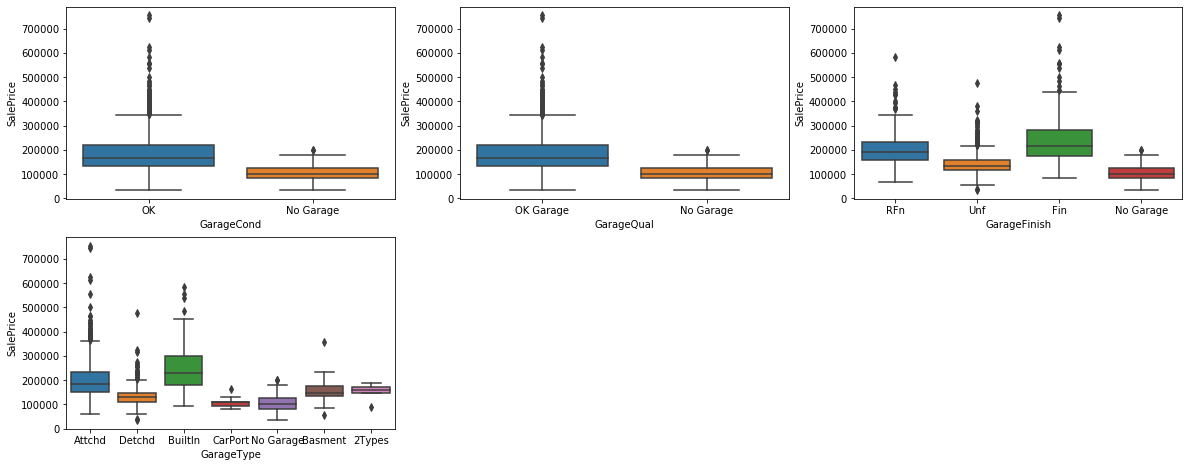

In [26]:
#Plotting the categorical variables related to Garage and checking correlation with SalePrice
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = house_price)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = house_price)
plt.subplot(3,3,3)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = house_price)
plt.subplot(3,3,4)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = house_price)

In [27]:
#GarageCond and GarageQual showing same in influence on SalePrice, one can be dropped
house_price=house_price.drop(['GarageQual'],axis=1)
#Garage type - CarPort, No Garage, Basement, 2Types can be combined as "Others"
#Imputing values to "Others"
house_price['GarageType'].replace({'CarPort':'No Garage'},inplace=True)
house_price['GarageType'].replace({'Basment':'No Garage'},inplace=True)
house_price['GarageType'].replace({'No Garage':'No Garage'},inplace=True)
house_price['GarageType'].replace({'2Types':'No Garage'},inplace=True)
print(100*(house_price['GarageType'].value_counts()/house_price['GarageType'].count()))

Attchd       59.589041
Detchd       26.506849
No Garage     7.876712
BuiltIn       6.027397
Name: GarageType, dtype: float64


In [28]:
#Cleaning variable PoolQC (Replacing NA t No Pool)
house_price['PoolQC'].replace({np.nan:'No Pool'},inplace=True)
print(100*(house_price['PoolQC'].value_counts()/house_price['PoolQC'].count()))
#Imputing level values of PoolQC
house_price['PoolQC'].replace({'Fa':'OK'},inplace=True)
house_price['PoolQC'].replace({'Gd':'OK'},inplace=True)
house_price['PoolQC'].replace({'Ex':'OK'},inplace=True)
print(100*(house_price['PoolQC'].value_counts()/house_price['PoolQC'].count()))

No Pool    99.520548
Gd          0.205479
Fa          0.136986
Ex          0.136986
Name: PoolQC, dtype: float64
No Pool    99.520548
OK          0.479452
Name: PoolQC, dtype: float64


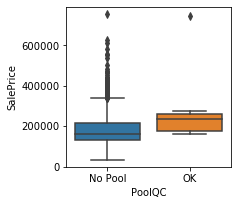

In [29]:
#Plotting the categorical variables related to PooQC to find which ones have correlation and can be dropped
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = house_price)
#PoolQC is only 0.4% of the houses so a small subset of data

In [30]:
#Sale Price is not strongly changing with Pool or No Pool, effects can be captured with Pool Area. Do dropping PoolQC
house_price=house_price.drop(['PoolQC'],axis=1)

In [31]:
#Cleaning variable Fence (Replacing NA to No Fence)
house_price['Fence'].replace({np.nan:'No Fence'},inplace=True)
print(100*(house_price['Fence'].value_counts()/house_price['Fence'].count()))
#Imputing level values of Fence 
house_price['Fence'].replace({'MnPrv':'Fence'},inplace=True)
house_price['Fence'].replace({'GdPrv':'Fence'},inplace=True)
house_price['Fence'].replace({'GdWo':'Fence'},inplace=True)
house_price['Fence'].replace({'MnWw':'Fence'},inplace=True)
print(100*(house_price['Fence'].value_counts()/house_price['Fence'].count()))

No Fence    80.753425
MnPrv       10.753425
GdPrv        4.041096
GdWo         3.698630
MnWw         0.753425
Name: Fence, dtype: float64
No Fence    80.753425
Fence       19.246575
Name: Fence, dtype: float64


In [32]:
#Cleaning  variable MiscFeature (Replacing NA to No Fence)
house_price['MiscFeature'].replace({np.nan:'None'},inplace=True)
100*(house_price['MiscFeature'].value_counts()/house_price['MiscFeature'].count())

None    96.301370
Shed     3.356164
Gar2     0.136986
Othr     0.136986
TenC     0.068493
Name: MiscFeature, dtype: float64

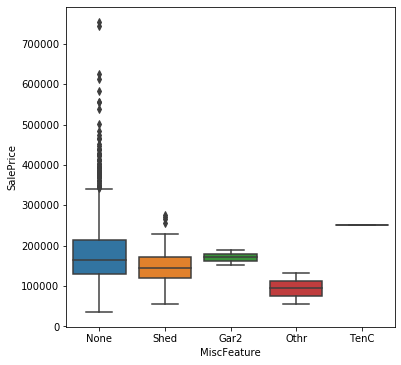

In [33]:
#Plotting the categorical variables related to MiscFeature to find which ones have correlation and can be dropped
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = house_price)
#MiscFeature levels are a minor subset in the dataset but seem to have a good influence on sale price.

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch
0           61              0          0            0
1            0              0          0            0
2           42              0          0            0
3           35            272          0            0
4           84              0          0            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
OpenPorchSF      1460 non-null int64
EnclosedPorch    1460 non-null int64
3SsnPorch        1460 non-null int64
ScreenPorch      1460 non-null int64
dtypes: int64(4)
memory usage: 45.8 KB
None


<Figure size 1440x720 with 0 Axes>

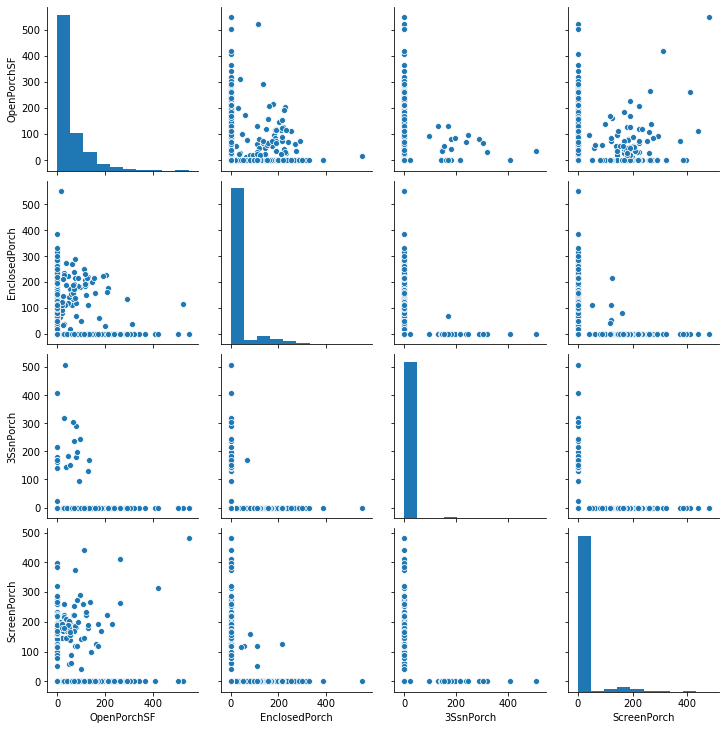

In [34]:
#checking into the Basement related attributes to understand the correlations
HouseAu_Porch=house_price[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']]
print(HouseAu_Porch.head())
print(HouseAu_Porch.info())
# pairwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(HouseAu_Porch)
plt.show()

In [35]:
#From the correlation pairplots, Out of four variables on Porch, we can capture key effects from Open Porch and Enclosed Porch
house_price=house_price.drop(['ScreenPorch','3SsnPorch'],axis=1)

In [36]:
#print(100*(house_price['Neighborhood'].astype('category').value_counts()/house_price['Neighborhood'].count()))
#Imputing values of the minor category levels in Neighborhood
house_price['Neighborhood'].replace({'ClearCr':'Others'},inplace=True)
house_price['Neighborhood'].replace({'SWISU':'Others'},inplace=True)
house_price['Neighborhood'].replace({'StoneBr':'Others'},inplace=True)
house_price['Neighborhood'].replace({'Blmngtn':'Others'},inplace=True)
house_price['Neighborhood'].replace({'MeadowV':'Others'},inplace=True)
house_price['Neighborhood'].replace({'BrDale':'Others'},inplace=True)
house_price['Neighborhood'].replace({'Veenker':'Others'},inplace=True)
house_price['Neighborhood'].replace({'NPkVill':'Others'},inplace=True)
house_price['Neighborhood'].replace({'Blueste':'Others'},inplace=True)
print(100*(house_price['Neighborhood'].astype('category').value_counts()/house_price['Neighborhood'].count()))

NAmes      15.410959
Others     10.273973
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.972603
Crawfor     3.493151
Mitchel     3.356164
NoRidge     2.808219
Timber      2.602740
IDOTRR      2.534247
Name: Neighborhood, dtype: float64


In [37]:
#Cleaning  variable LotFrontage (Replacing NA to 0)
house_price['LotFrontage'].replace({np.nan:'0'},inplace=True)
house_price['LotFrontage']=house_price['LotFrontage'].values.astype(np.int64)
100*(house_price['LotFrontage'].value_counts()/house_price['LotFrontage'].count())
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null int64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-n

In [38]:
# Dropping duplicate values in dataset, if exist
house_price = house_price.drop_duplicates()
print(f'\nShape of dataframe:\n{house_price.shape}')
house_price.head()


Shape of dataframe:
(1460, 70)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,No Fence,None,0,12,2008,WD,Normal,250000


In [39]:
# Removing identifier field
house_price.drop(['Id'], axis=1, inplace=True)

In [40]:
#MasVnrArea: Masonry veneer area in square feet
100*(house_price['MasVnrType'].astype('category').value_counts()/house_price['MasVnrType'].count())

None       59.504132
BrkFace    30.647383
Stone       8.815427
BrkCmn      1.033058
Name: MasVnrType, dtype: float64

In [41]:
#MiscFeature column has almost 99% null values so we will drop it
house_price= house_price.drop('MiscFeature', axis=1)

In [42]:
house_price=house_price.drop(['GarageYrBlt'],axis=1) # dropping As it is same as Year Built

In [43]:
#Replacing missing value with Unknown
house_price['Electrical'].replace({np.nan:'Unknown'},inplace=True)
print(100*(house_price['Electrical'].value_counts()/house_price['Electrical'].count()))
#Imputing the minor category levels of Electrical
house_price['Electrical'].replace({'FuseA':'Other'},inplace=True)
house_price['Electrical'].replace({'FuseF':'Other'},inplace=True)
house_price['Electrical'].replace({'FuseP':'Other'},inplace=True)
house_price['Electrical'].replace({'Mix':'Other'},inplace=True)
house_price['Electrical'].replace({'Unknown':'Other'},inplace=True)
print(100*(house_price['Electrical'].value_counts()/house_price['Electrical'].count()))

SBrkr      91.369863
FuseA       6.438356
FuseF       1.849315
FuseP       0.205479
Unknown     0.068493
Mix         0.068493
Name: Electrical, dtype: float64
SBrkr    91.369863
Other     8.630137
Name: Electrical, dtype: float64


In [44]:
# checking whether some rows have more than 1 missing values
len(house_price[house_price.isnull().sum(axis=1) > 1].index)

8

In [45]:
#Dropping NULL Rows 
house_price=house_price.dropna(how='any',axis=0)

In [46]:
# checking whether again if rows have more than 1 missing values
len(house_price[house_price.isnull().sum(axis=1) > 1].index)

0

In [47]:
#Dropping column MasVnrarea and LotFrontage as these are not adding value
house_price=house_price.drop(['MasVnrArea','LotFrontage'],axis=1)

In [48]:
# checking missing again

round(house_price.isnull().sum()/len(house_price.index),2)[round(house_price.isnull().sum()/
                                                                 len(house_price.index),2).values!=0]

Series([], dtype: float64)

In [49]:
#finding uniqness in records we see there is no attribute column with a single value
house_price.nunique().sort_values(ascending =True)

Electrical        2
GarageCond        2
Street            2
CentralAir        2
FireplaceQu       2
               ... 
SalePrice       657
TotalBsmtSF     717
1stFlrSF        749
GrLivArea       858
LotArea        1067
Length: 65, dtype: int64

In [50]:
# converting month sold numerical values to categorical values
house_price.MoSold = house_price.MoSold.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
house_price.MoSold

0       Feb
1       May
2       Sep
3       Feb
4       Dec
       ... 
1455    Aug
1456    Feb
1457    May
1458    Apr
1459    Jun
Name: MoSold, Length: 1452, dtype: object

In [51]:
# Creating derived features
house_price['YearBuilt_Old'] = house_price.YearBuilt.max()-house_price.YearBuilt
house_price['YearRemodAdd_Old'] = house_price.YearRemodAdd.max()-house_price.YearRemodAdd
#house_price['GarageYrBlt_Old'] = house_price.GarageYrBlt.max()-house_price.GarageYrBlt
house_price['YrSold_Old'] = house_price.YrSold.max()-house_price.YrSold
house_price[['YearBuilt','YearRemodAdd','YrSold','YearBuilt_Old','YearRemodAdd_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,YrSold,YearBuilt_Old,YearRemodAdd_Old,YrSold_Old
1265,1999,1999,2006,11,11,4
1288,2000,2000,2009,10,10,1
380,1924,1950,2010,86,60,0
1031,1920,1970,2009,90,40,1
30,1920,1950,2008,90,60,2
904,1967,1967,2007,43,43,3
1283,1971,1971,2010,39,39,0
731,2003,2003,2007,7,7,3
672,1977,1977,2006,33,33,4
1040,1957,2000,2006,53,10,4


In [52]:
#Lets drop the actual Year columns
house_price = house_price.drop(['YearBuilt','YearRemodAdd','YrSold'],axis='columns')

In [53]:
house_price.Street.value_counts()
house_price.Utilities.value_counts()
house_price = house_price.drop(['Street','Utilities'],axis='columns')

In [54]:
# Separating numerical and categorical fields for analysisng them separately using the provided Data Dictionary.

# # OUTCOME COLUMN:
out_col = 'SalePrice'

# NUMERICAL COLUMNS: 

num_col = list(house_price.dtypes[house_price.dtypes !='object'].index)

print(len(num_col))

# CATEGORICAL COLUMNS: 

cat_col = list(house_price.dtypes[house_price.dtypes =='object'].index)

print(len(cat_col))

# Listing distinct variables for each Categorical columns to address issues if any
for col in cat_col:
    print(col,' : ',house_price[col].unique())

    
    


28
35
MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Others' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'Edwards' 'Timber' 'Gilbert']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle  :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl  :  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st  :  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn'

##### Observation
1. These 63 columns comprises of both dimensions (categorical value) and measures (numeric value)
2. There are 28 numeric columns, 35 categorical columns and 1 output column

----

## 3. Exploratory Data Analysis

In [55]:
# defening a Function for Analysis of Numerical column
def number_col_analysis(i, col_i,col_o):
    plt.figure(i)
    sns.jointplot(x=col_i, y=col_o, data=house_price[[col_i,col_o]])

In [56]:
# defening a Function for Analysis of Categorical column
def category_col_analysis(i, col_i,col_o):
    plt.figure(i)
    variables = house_price[[col_i]].nunique()
    plt.figure(figsize=(variables,variables/1.77))
    my_order = house_price[[col_i,col_o]].groupby(by=[col_i])[col_o].median().sort_values(ascending=True)
    sns.boxplot(x=col_i, y=col_o, data=house_price[[col_i,col_o]], order=my_order.index)

<Figure size 432x288 with 0 Axes>

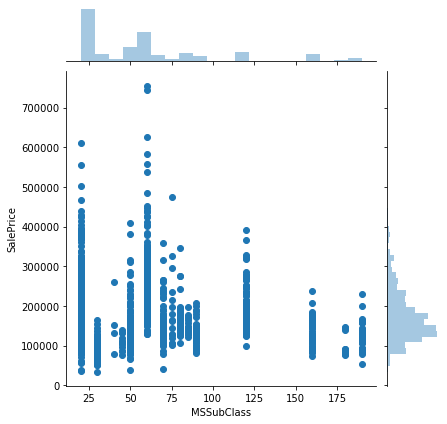

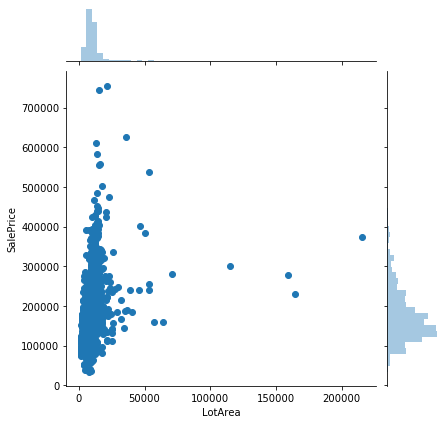

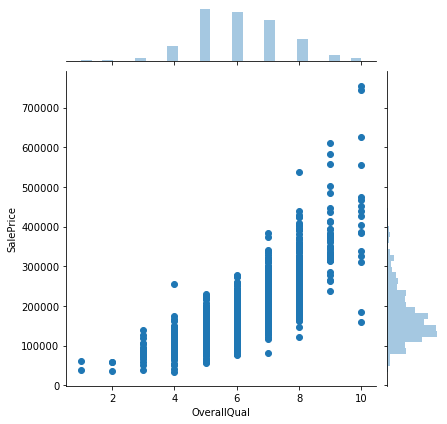

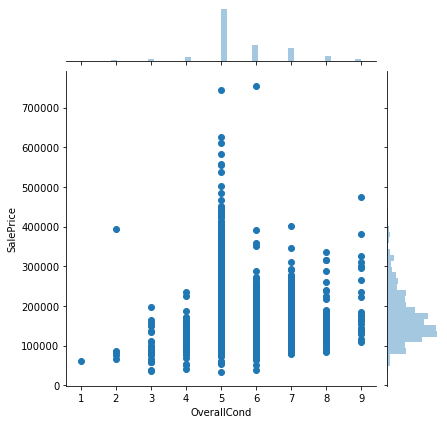

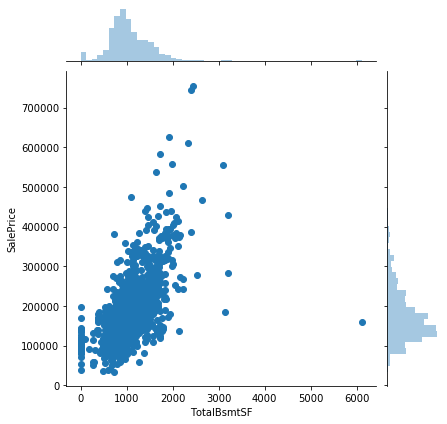

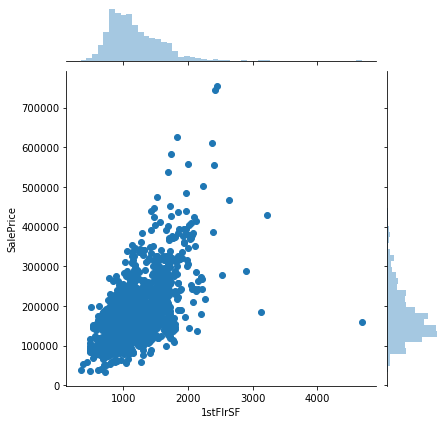

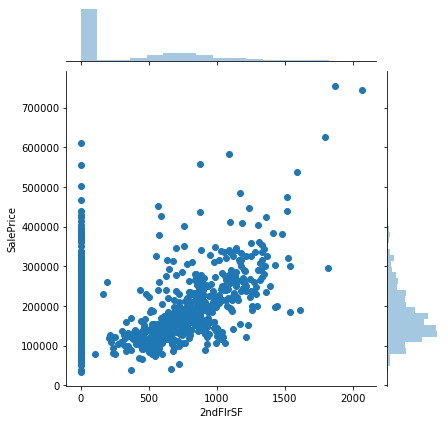

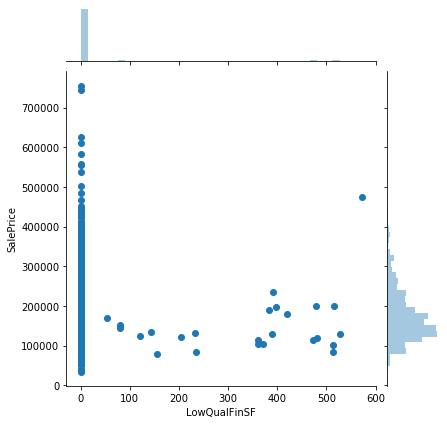

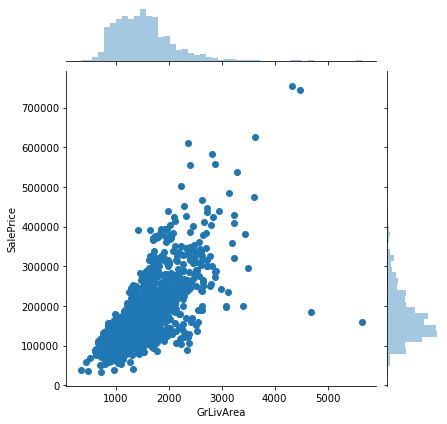

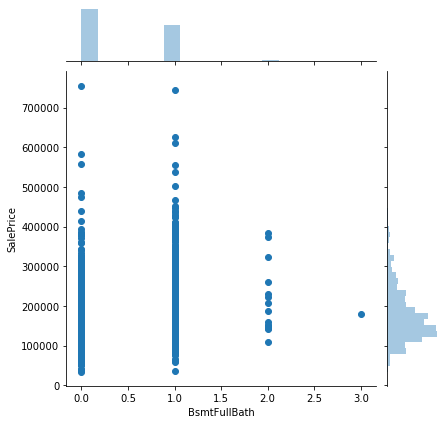

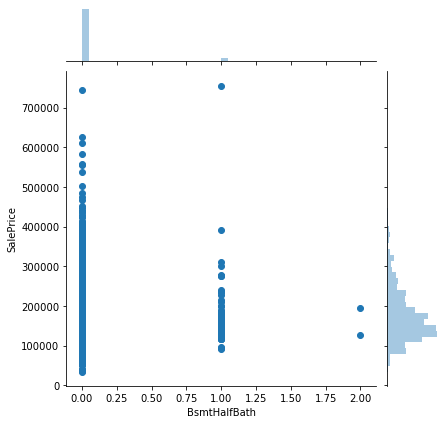

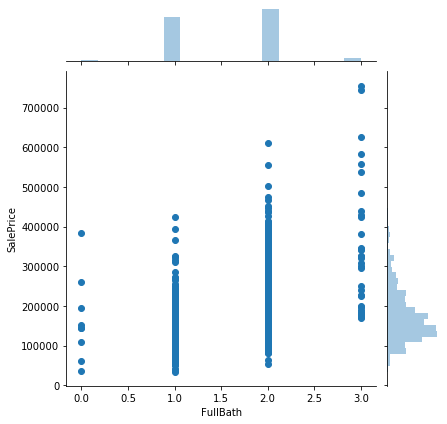

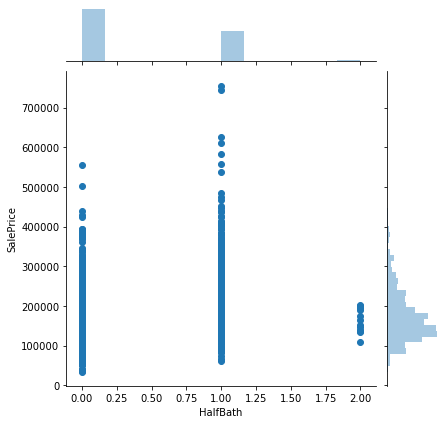

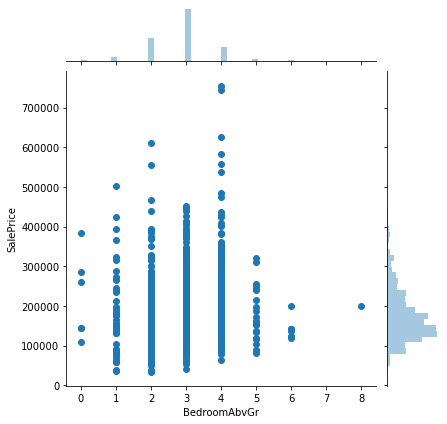

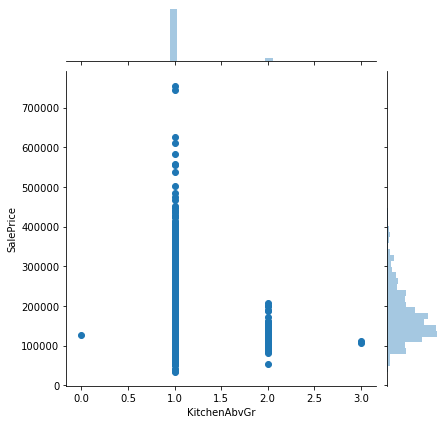

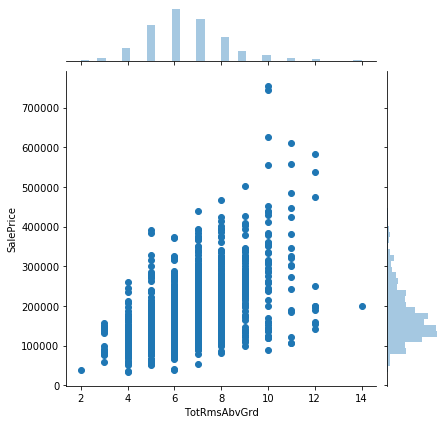

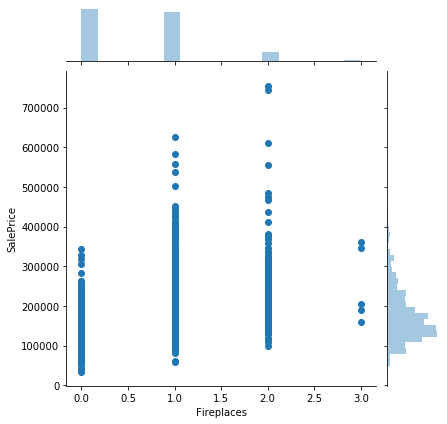

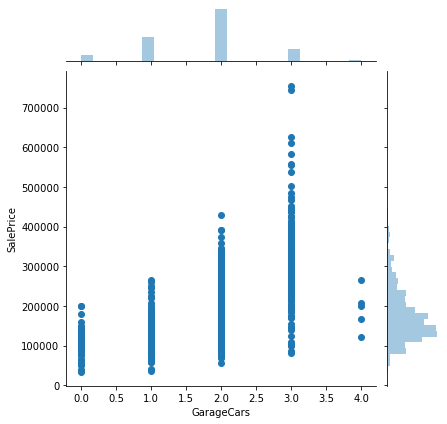

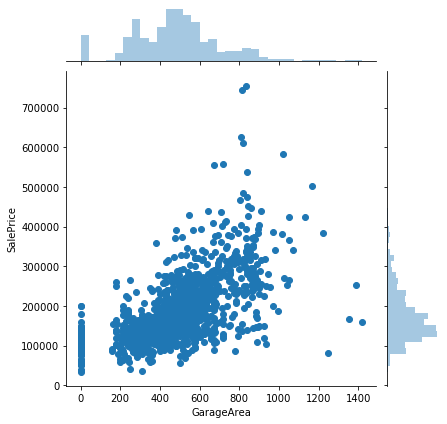

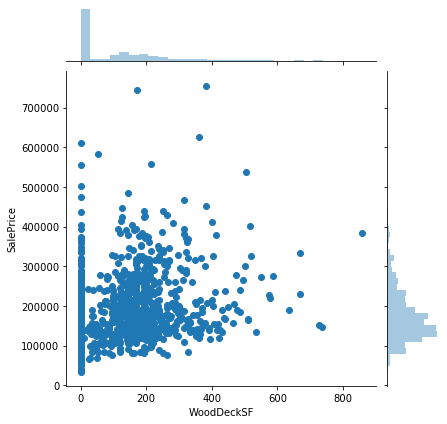

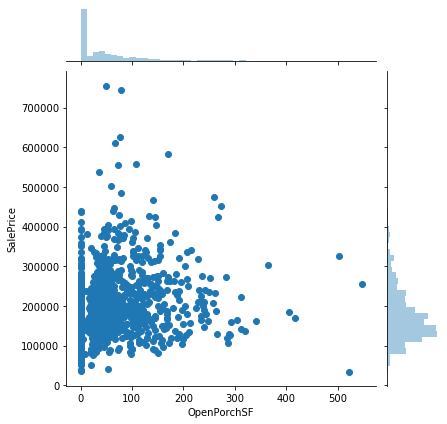

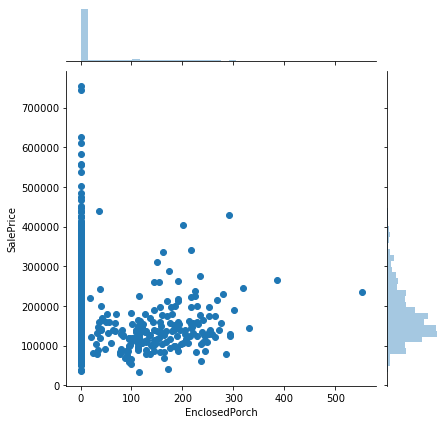

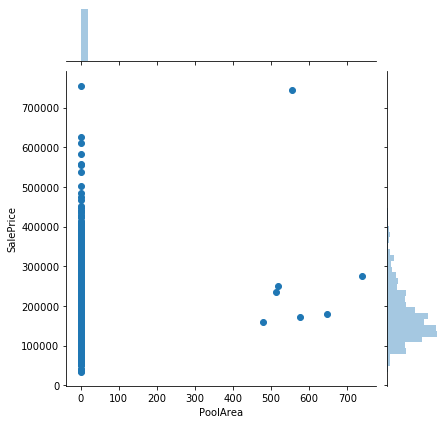

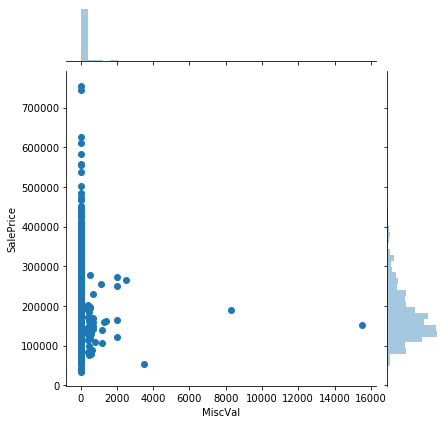

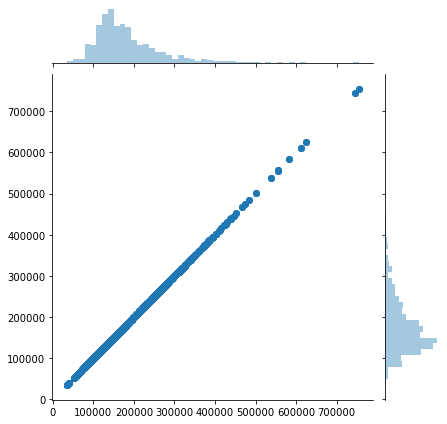

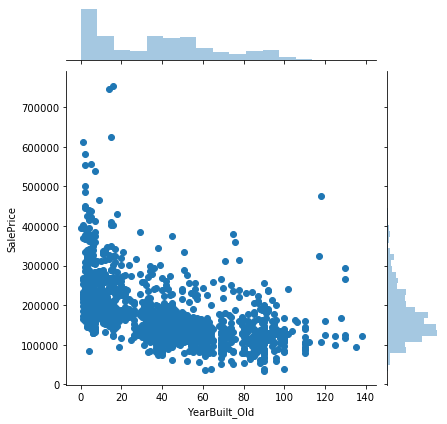

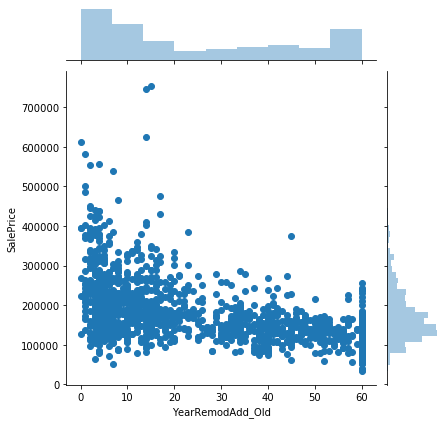

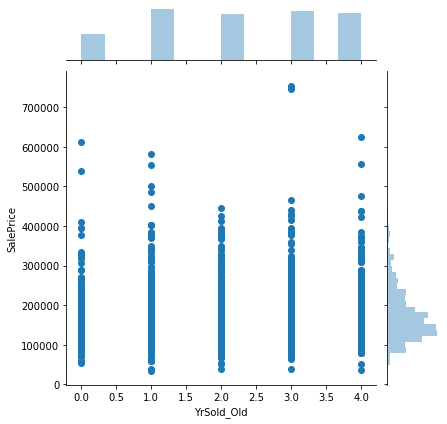

In [57]:
# Doing NUMERICAL COLUMN ANALYSIS
for i, col in enumerate(num_col):
    number_col_analysis(i, col, out_col)

<Figure size 432x288 with 0 Axes>

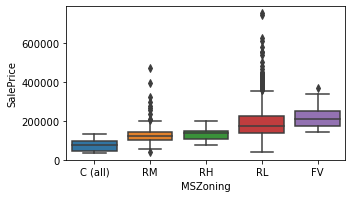

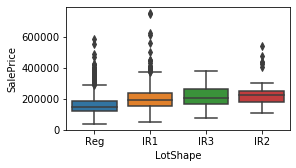

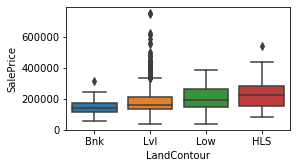

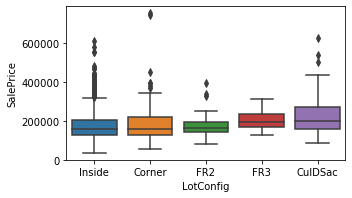

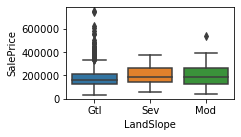

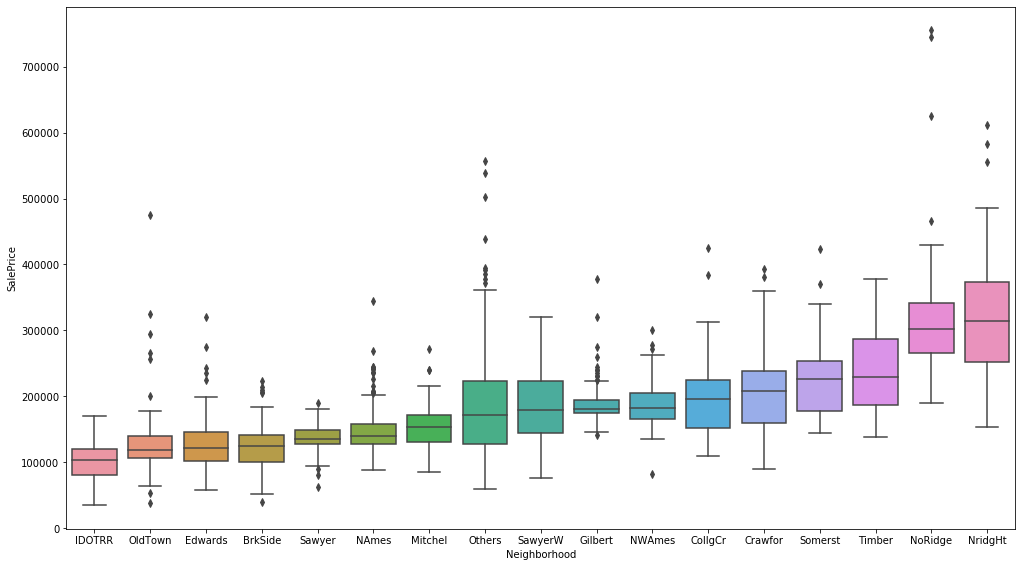

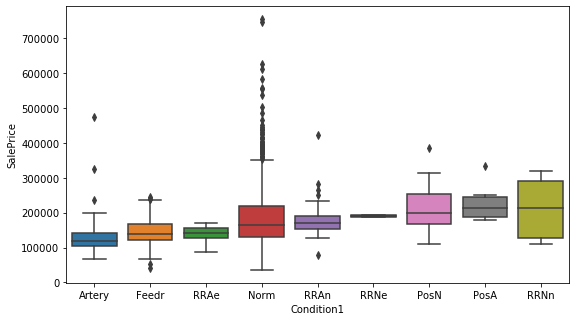

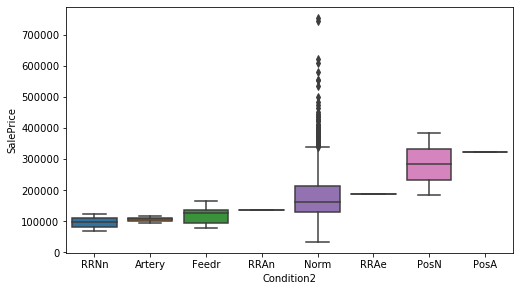

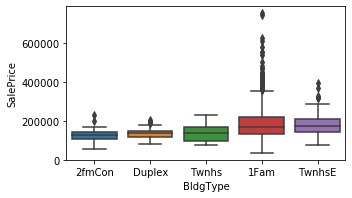

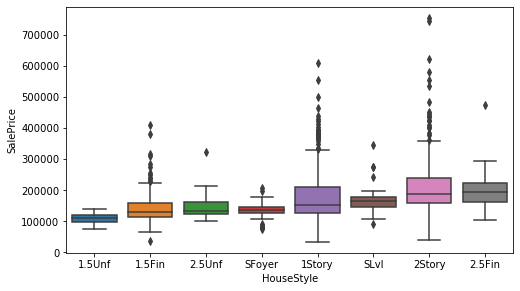

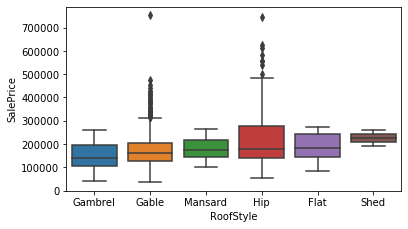

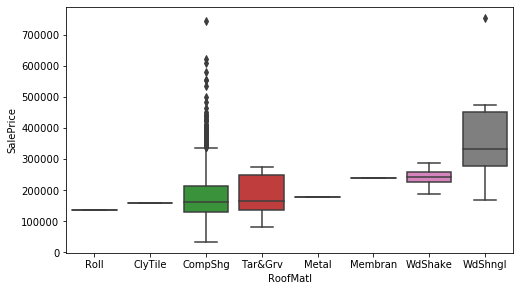

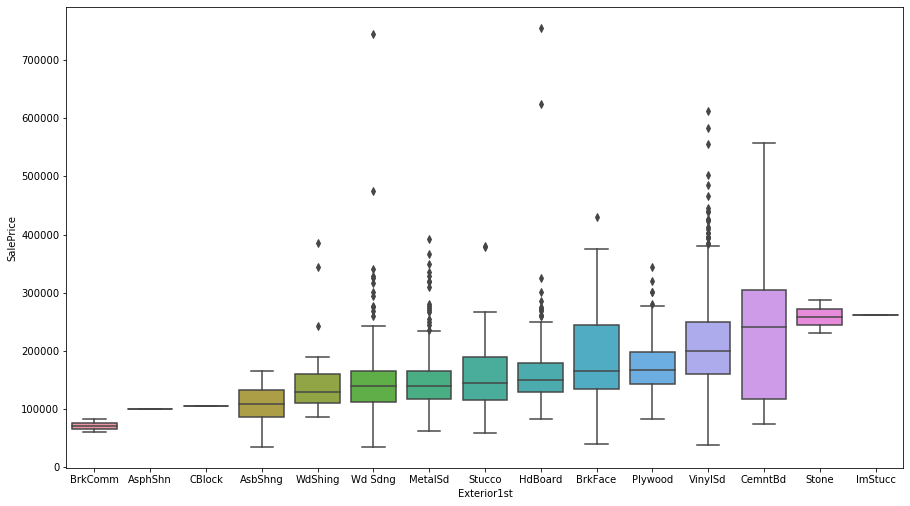

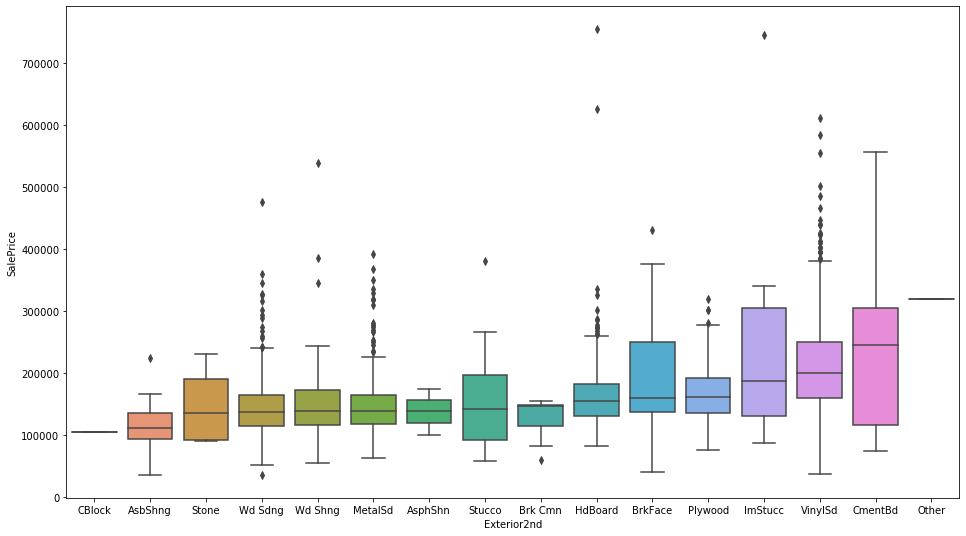

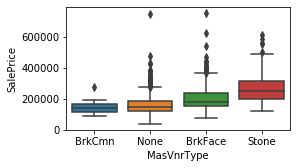

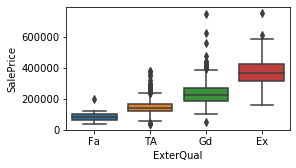

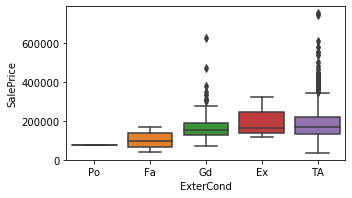

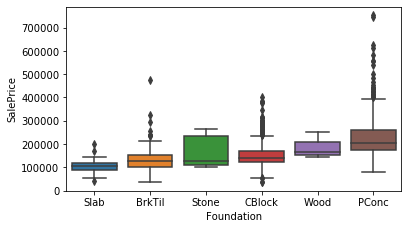

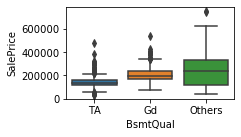

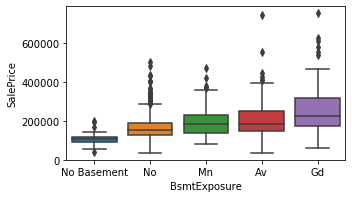

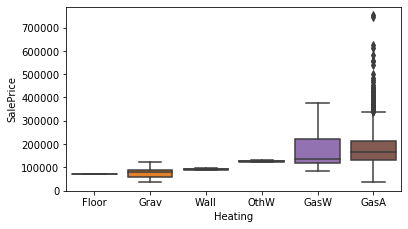

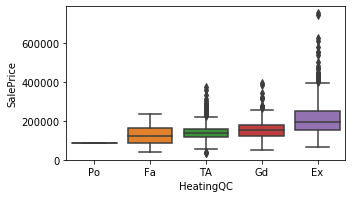

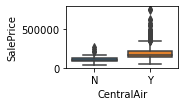

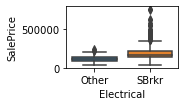

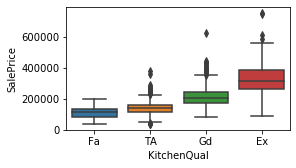

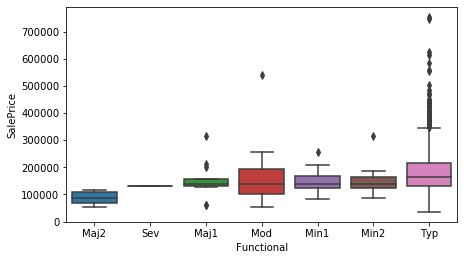

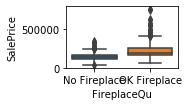

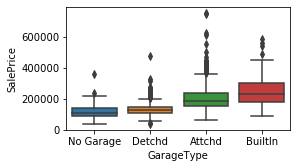

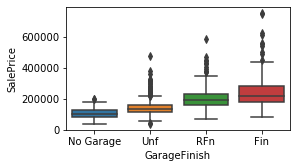

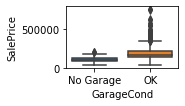

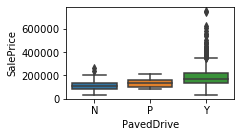

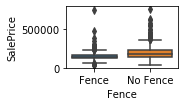

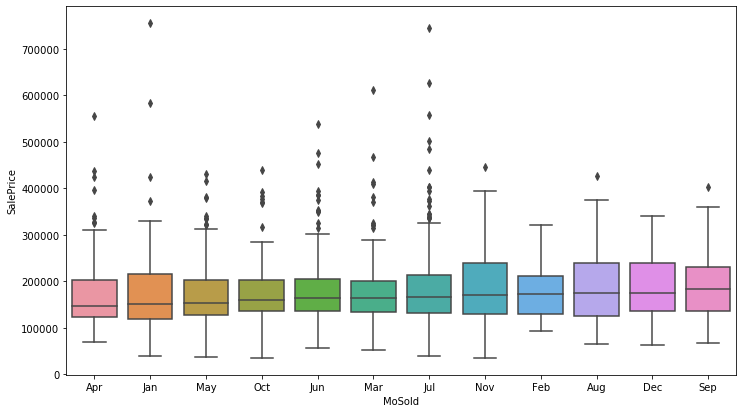

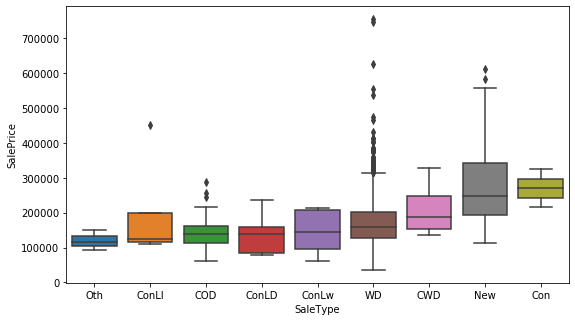

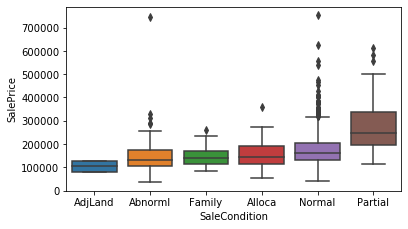

In [58]:
# Doing CATEGORICAL COLUMN ANALYSIS
for i, col in enumerate(cat_col):
    category_col_analysis(i, col, out_col)

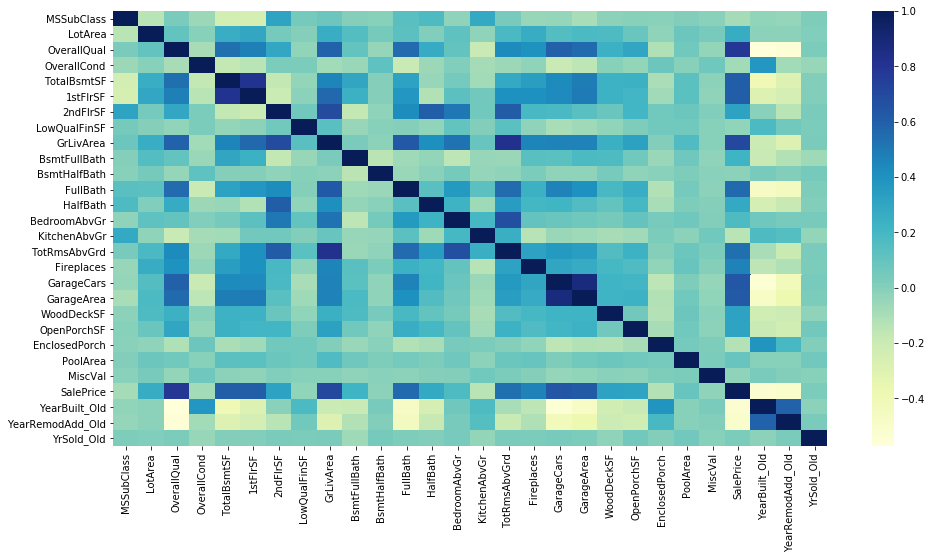

In [59]:
# plotting correlations on a heatmap for better understanding

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(house_price.corr(), cmap="YlGnBu", annot=False)
plt.show()

From the Heatmap we can observe that attributes like OveralQual, GrLivArea, GarageCars,GarageArea,FullBath and few other variables clearly have a strong correlation with the dependant variable SalePrice

##### Observation
1. There plots above shows there exist some linear relationship between various columns and output column.

------

## 4. Data Preparation

In [60]:
# removing outliers
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_price = drop_outliers(house_price)

In [61]:
house_price.shape

(1433, 63)

In [62]:
house_price[list(house_price.dtypes[house_price.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageCond,PavedDrive,Fence,MoSold,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,Typ,No Fireplace,Attchd,RFn,OK,Y,No Fence,Feb,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Others,Feedr,Norm,1Fam,1Story,...,Typ,OK Fireplace,Attchd,RFn,OK,Y,No Fence,May,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,Typ,OK Fireplace,Attchd,RFn,OK,Y,No Fence,Sep,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,Typ,OK Fireplace,Detchd,Unf,OK,Y,No Fence,Feb,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,Typ,OK Fireplace,Attchd,RFn,OK,Y,No Fence,Dec,WD,Normal


In [63]:
# Lets check for the below columns here we can clearly see that these are having some kind of order and 
#hence we can say these are ordinal in nature
house_price[['LandSlope','ExterQual','BsmtQual','BsmtExposure',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtExposure,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,No,Ex,Y,Gd,RFn,OK,TA,Reg
1,Gtl,TA,Gd,Gd,Ex,Y,TA,RFn,OK,TA,Reg
2,Gtl,Gd,Gd,Mn,Ex,Y,Gd,RFn,OK,TA,IR1
3,Gtl,TA,TA,No,Gd,Y,Gd,Unf,OK,TA,IR1
4,Gtl,Gd,Gd,Av,Ex,Y,Gd,RFn,OK,TA,IR1


In [64]:
house_price['LotShape'].value_counts()

Reg    910
IR1    476
IR2     39
IR3      8
Name: LotShape, dtype: int64

In [65]:
#Giving some order to ordinal varaibles 
house_price['LandSlope'] = house_price.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_price['ExterQual'] = house_price.ExterQual.map({'Fa':0,'TA':1,'Gd':2,'Ex':3})
house_price['BsmtQual'] = house_price.BsmtQual.map({'TA':0,'Gd':1,'Others':3})
house_price['BsmtExposure'] = house_price.BsmtExposure.map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_price['HeatingQC'] = house_price.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['CentralAir'] = house_price.CentralAir.map({'N':0,'Y':1})
house_price['KitchenQual'] = house_price.KitchenQual.map({'Fa':0,'TA':1,'Gd':2,'Ex':3})
house_price['GarageFinish'] = house_price.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
house_price['GarageCond'] = house_price.GarageCond.map({'OK':0,'No Garage':1})
house_price['ExterCond'] = house_price.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_price['LotShape'] = house_price.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [66]:
house_price[['LandSlope','ExterQual','BsmtQual','BsmtExposure',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtExposure,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageCond,ExterCond,LotShape
0,0,2,1,1,4,1,2,2,0,2,3
1,0,1,1,4,4,1,1,2,0,2,3
2,0,2,1,2,4,1,2,2,0,2,0
3,0,1,0,1,3,1,2,1,0,2,0
4,0,2,1,3,4,1,2,2,0,2,0


In [67]:
house_price[list(house_price.dtypes[house_price.dtypes =='object'].index)].head(5)

,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,Heating,Electrical,Functional,FireplaceQu,GarageType,PavedDrive,Fence,MoSold,SaleType,SaleCondition
0,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,GasA,SBrkr,Typ,No Fireplace,Attchd,Y,No Fence,Feb,WD,Normal
1,RL,Lvl,FR2,Others,Feedr,Norm,1Fam,1Story,Gable,CompShg,...,GasA,SBrkr,Typ,OK Fireplace,Attchd,Y,No Fence,May,WD,Normal
2,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,GasA,SBrkr,Typ,OK Fireplace,Attchd,Y,No Fence,Sep,WD,Normal
3,RL,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,...,GasA,SBrkr,Typ,OK Fireplace,Detchd,Y,No Fence,Feb,WD,Abnorml
4,RL,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,...,GasA,SBrkr,Typ,OK Fireplace,Attchd,Y,No Fence,Dec,WD,Normal


In [68]:
# creating dummy varaibles for all category columns using a loop
for col in cat_col:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies = pd.get_dummies(house_price[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    house_price = pd.concat([house_price, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    house_price.drop([col], axis = 1, inplace = True)

house_price.head()

,MSSubClass,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,856,856,854,0,1710,1,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1262,1262,0,0,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,920,920,866,0,1786,1,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,756,961,756,0,1717,1,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,1145,1145,1053,0,2198,1,...,0,0,0,0,1,0,0,0,1,0


In [69]:
house_price[list(house_price.dtypes[house_price.dtypes !='object'].index)].head(5)

,MSSubClass,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,856,856,854,0,1710,1,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1262,1262,0,0,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,920,920,866,0,1786,1,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,756,961,756,0,1717,1,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,1145,1145,1053,0,2198,1,...,0,0,0,0,1,0,0,0,1,0


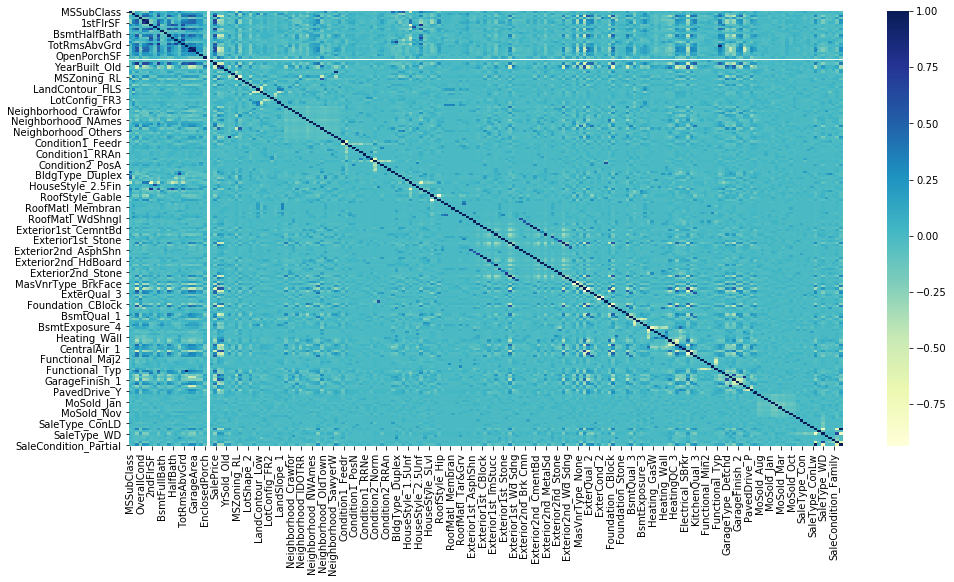

In [70]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(house_price.corr(), cmap="YlGnBu", annot=False)
plt.show()

##### Observation 
1. The heatmap is very condensed, this means we do have a lot of collinearity in data, hence feature selection is necessary.

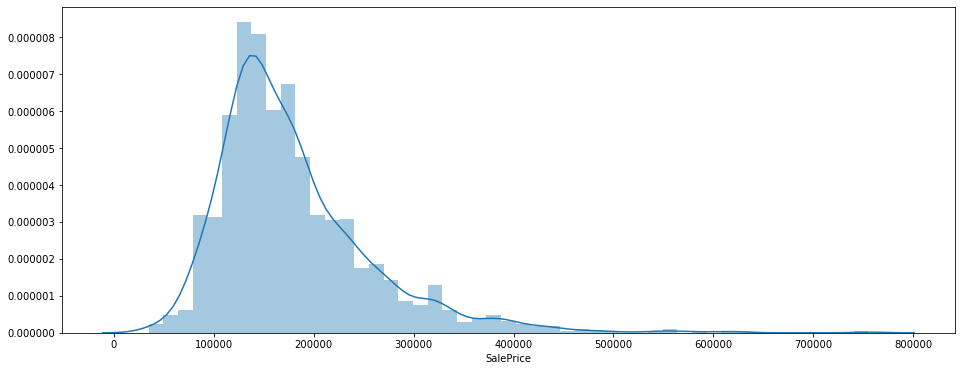

In [71]:
# plotting the sales before sclaing
plt.figure(figsize=(16,6))
sns.distplot(house_price.SalePrice)
plt.show()

In [72]:
list(house_price.dtypes[house_price.dtypes!='object'].index)

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'YearBuilt_Old',
 'YearRemodAdd_Old',
 'YrSold_Old',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_1',
 'LotShape_2',
 'LotShape_3',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_1',
 'LandSlope_2',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Othe

In [73]:
house_price.head(5)

,MSSubClass,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,856,856,854,0,1710,1,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1262,1262,0,0,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,920,920,866,0,1786,1,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,756,961,756,0,1717,1,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,1145,1145,1053,0,2198,1,...,0,0,0,0,1,0,0,0,1,0


In [74]:
# spliting the data set for traing and testing.
np.random.seed(0)

df_train,df_test = train_test_split(house_price,train_size=0.7,test_size=0.3,random_state=42)

In [75]:
num_col = list(house_price.dtypes[house_price.dtypes !='object'].index)

In [76]:
#scaling the data set
scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [77]:
df_test.head(5)

,MSSubClass,LotArea,OverallQual,OverallCond,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
376,0.692444,-0.214826,-0.799604,-0.511868,-0.460388,-0.663363,-0.801284,-0.129565,-1.161337,-0.839148,...,-0.044699,-0.044699,-0.315881,-0.044699,0.397742,-0.054772,-0.077576,-0.127321,0.481858,-0.317786
569,0.812479,-0.528843,-0.799604,-0.511868,-0.285389,-0.584928,-0.801284,-0.129565,-1.105364,1.127360,...,-0.044699,-0.044699,-0.315881,-0.044699,0.397742,-0.054772,-0.077576,-0.127321,0.481858,-0.317786
1025,-0.868009,-0.413207,-0.799604,-0.511868,-0.431621,-0.749912,-0.801284,-0.129565,-1.223101,1.127360,...,-0.044699,-0.044699,-0.315881,-0.044699,0.397742,-0.054772,-0.077576,-0.127321,0.481858,-0.317786
598,-0.868009,0.501493,-0.799604,0.396811,0.882069,1.319140,-0.801284,-0.129565,0.253438,1.127360,...,-0.044699,-0.044699,-0.315881,-0.044699,0.397742,-0.054772,-0.077576,-0.127321,0.481858,-0.317786
1001,-0.627939,-0.811354,-0.799604,0.396811,-0.889495,-1.266498,-0.801284,-0.129565,-1.591753,-0.839148,...,-0.044699,-0.044699,-0.315881,-0.044699,0.397742,-0.054772,-0.077576,-0.127321,-2.075302,-0.317786


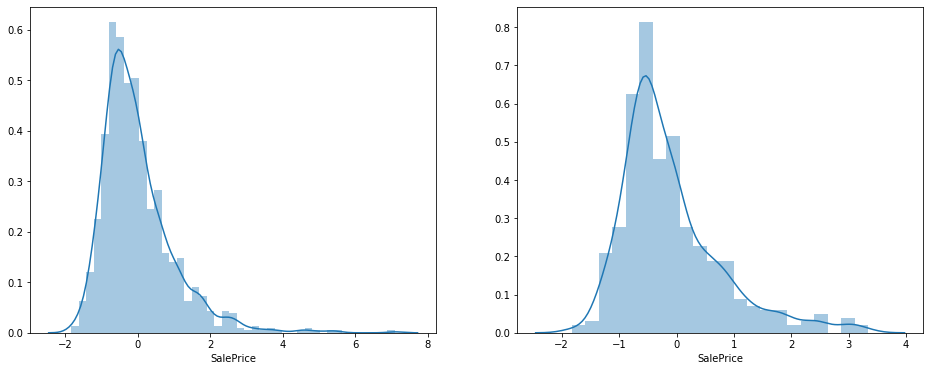

In [78]:
# Lets check the distribution again after scaling
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [79]:
# Spliting the dependent and independent variable
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [80]:
len(X_train.columns)

200

----

## 5.  Building Models

### 5.(A) Performing Simple Linear Regression

In [81]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9345367901865784
-1.1154912707912087e+18


##### Observation 
1. Simple Linear Regression gave us a complex model with most of the coefficients as non-zero values.
2. Model Accuracy on test data is worst.

### 5.(B) Performing RFE for Feature Selection

In [82]:
len(X_train.columns)

200

In [83]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,25)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=25, step=1, verbose=0)

In [84]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [85]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [86]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

----

### 5.(C) Performing Ridge Regression

In [87]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [88]:
cv_results = pd.DataFrame(model_ridge_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006800,0.002638,0.002600,0.000799,0.0001,{'alpha': 0.0001},-0.221238,-0.204768,-0.233981,-0.216958,...,-0.222555,0.011456,26,-0.207764,-0.211596,-0.209876,-0.206606,-0.201866,-0.207542,0.003317
1,0.010201,0.008401,0.002999,0.000632,0.001,{'alpha': 0.001},-0.221237,-0.204768,-0.233979,-0.216958,...,-0.222555,0.011456,25,-0.207764,-0.211596,-0.209876,-0.206606,-0.201866,-0.207542,0.003317
2,0.008400,0.002418,0.003599,0.000490,0.01,{'alpha': 0.01},-0.221235,-0.204764,-0.233965,-0.216959,...,-0.222547,0.011451,24,-0.207762,-0.211595,-0.209873,-0.206605,-0.201863,-0.207540,0.003318
3,0.006600,0.001020,0.003399,0.001022,0.05,{'alpha': 0.05},-0.221222,-0.204748,-0.233904,-0.216960,...,-0.222516,0.011427,23,-0.207756,-0.211592,-0.209861,-0.206600,-0.201848,-0.207532,0.003320
4,0.007400,0.001496,0.003202,0.000402,0.1,{'alpha': 0.1},-0.221207,-0.204728,-0.233830,-0.216962,...,-0.222477,0.011399,22,-0.207748,-0.211587,-0.209847,-0.206595,-0.201831,-0.207522,0.003323


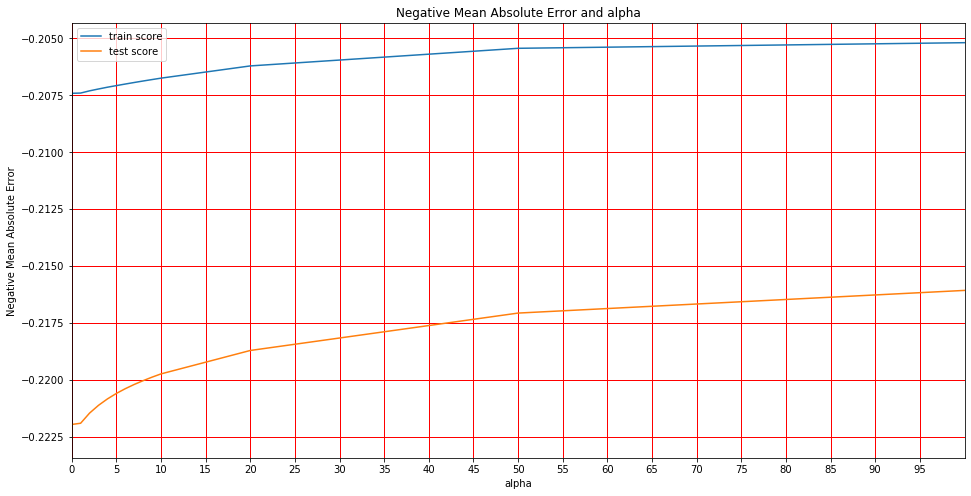

In [89]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [90]:
print(model_ridge_cv.best_score_ )
print(model_ridge_cv.best_params_ )
print(model_ridge_cv.best_estimator_ )
print(model_ridge_cv.best_index_ )

-0.21606942898932818
{'alpha': 100}
Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
25


In [91]:
ridge_alpha = model_ridge_cv.best_params_['alpha'] 
ridge_alpha

100

In [92]:
ridge = Ridge(alpha=ridge_alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9037758130080379
0.8017298407351707


In [93]:
# Lets find the coeffients for features selected by the model
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train.columns
cols = cols.insert(0, "constant")
sorted(list(zip(cols, model_parameters)),key=lambda x: abs(x[1]),reverse=True)

[('LowQualFinSF', 0.206),
 ('OverallQual', 0.176),
 ('2ndFlrSF', 0.162),
 ('BedroomAbvGr', -0.162),
 ('FullBath', -0.141),
 ('TotalBsmtSF', 0.14),
 ('EnclosedPorch', 0.108),
 ('1stFlrSF', 0.1),
 ('WoodDeckSF', 0.09),
 ('LotArea', 0.083),
 ('GarageArea', 0.082),
 ('BsmtHalfBath', 0.081),
 ('OpenPorchSF', 0.08),
 ('HalfBath', 0.077),
 ('OverallCond', 0.074),
 ('PoolArea', 0.063),
 ('GrLivArea', 0.059),
 ('KitchenAbvGr', -0.059),
 ('GarageCars', 0.056),
 ('MSSubClass', -0.048),
 ('BsmtFullBath', -0.042),
 ('MiscVal', -0.028),
 ('YearBuilt_Old', -0.018),
 ('Fireplaces', 0.007),
 ('TotRmsAbvGrd', 0.002),
 ('constant', 0.0)]

In [94]:
# finding the top 5 features selected as part of model
top5_ridge_features = [x[0] for x in sorted(list(zip(cols, model_parameters)),key=lambda x: abs(x[1]),reverse=True) if x[0] != 'constant'][:6]
top5_ridge_features

['LowQualFinSF',
 'OverallQual',
 '2ndFlrSF',
 'BedroomAbvGr',
 'FullBath',
 'TotalBsmtSF']

##### Observation 
1. Ridge regression gave us a complex model with most of the coefficients as non-zero values.
2. Ridge regression has not helped us in the feature selection.

----

### 5.(D) Performing Lasso Regression

In [95]:
lasso = Lasso()

# cross validation
model_lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [96]:
cv_results = pd.DataFrame(model_lasso_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022199,0.003488,0.003201,0.000979,0.0001,{'alpha': 0.0001},-0.221085,-0.204615,-0.233663,-0.217084,...,-0.222371,0.011335,3,-0.207679,-0.211549,-0.209802,-0.206547,-0.201759,-0.207467,0.003334
1,0.016207,0.004344,0.002594,0.000496,0.001,{'alpha': 0.001},-0.219704,-0.203245,-0.231464,-0.217355,...,-0.220933,0.010781,2,-0.206856,-0.211158,-0.209289,-0.206048,-0.201166,-0.206903,0.003390
2,0.009997,0.001999,0.003001,0.000635,0.01,{'alpha': 0.01},-0.215149,-0.198966,-0.224328,-0.219803,...,-0.218132,0.011148,1,-0.206650,-0.210903,-0.209474,-0.203812,-0.200655,-0.206299,0.003727
3,0.009000,0.001674,0.003199,0.000401,0.05,{'alpha': 0.05},-0.229133,-0.227126,-0.245514,-0.238775,...,-0.242115,0.015459,4,-0.231407,-0.233222,-0.230949,-0.226355,-0.230404,-0.230467,0.002263
4,0.008000,0.002098,0.002799,0.000402,0.1,{'alpha': 0.1},-0.254975,-0.253752,-0.265560,-0.275141,...,-0.273601,0.023794,5,-0.271737,-0.266655,-0.254710,-0.261139,-0.267677,-0.264384,0.005902


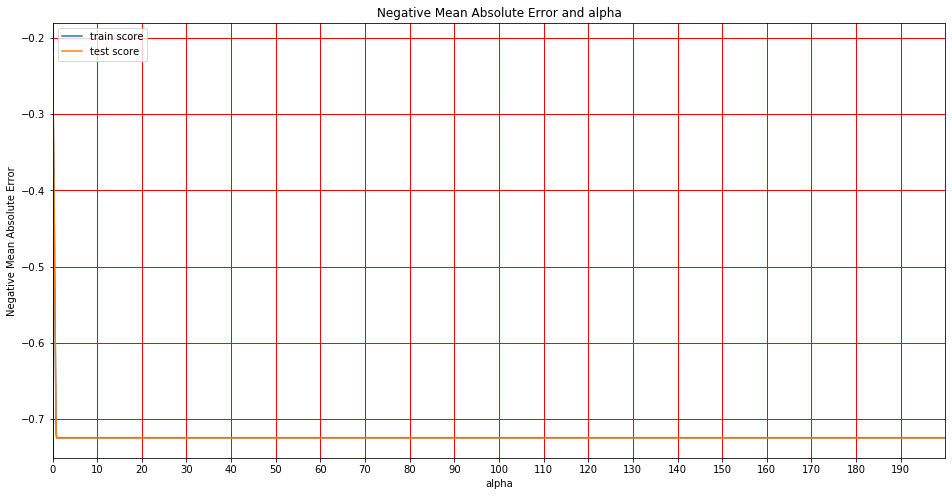

In [97]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [98]:
print(model_lasso_cv.best_score_ )
print(model_lasso_cv.best_params_ )
print(model_lasso_cv.best_estimator_ )
print(model_lasso_cv.best_index_ )

-0.21813171376016088
{'alpha': 0.01}
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
2


In [99]:
lasso_alpha = model_lasso_cv.best_params_['alpha'] 
lasso_alpha

0.01

In [100]:
lasso = Lasso(alpha=lasso_alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9037567612397784
0.795785099673914


In [101]:

# Lets find the coeffients for features selected by the model
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train.columns
cols = cols.insert(0, "constant")
sorted(list(zip(cols, model_parameters)),key=lambda x: abs(x[1]),reverse=True)

[('LowQualFinSF', 0.369),
 ('OverallQual', 0.185),
 ('BedroomAbvGr', -0.171),
 ('FullBath', -0.159),
 ('TotalBsmtSF', 0.144),
 ('EnclosedPorch', 0.107),
 ('WoodDeckSF', 0.091),
 ('LotArea', 0.081),
 ('GarageArea', 0.079),
 ('OpenPorchSF', 0.079),
 ('OverallCond', 0.073),
 ('HalfBath', 0.07),
 ('PoolArea', 0.061),
 ('BsmtHalfBath', 0.06),
 ('GrLivArea', 0.056),
 ('KitchenAbvGr', -0.055),
 ('BsmtFullBath', -0.047),
 ('GarageCars', 0.047),
 ('MSSubClass', -0.046),
 ('2ndFlrSF', 0.042),
 ('constant', 0.0),
 ('1stFlrSF', 0.0),
 ('TotRmsAbvGrd', -0.0),
 ('Fireplaces', 0.0),
 ('MiscVal', -0.0),
 ('YearBuilt_Old', -0.0)]

In [102]:
# finding the top 5 features selected as part of model
top5_lasso_features = [x[0] for x in sorted(list(zip(cols, model_parameters)),key=lambda x: abs(x[1]),reverse=True) if x[0] != 'constant'][:6]
top5_lasso_features

['LowQualFinSF',
 'OverallQual',
 'BedroomAbvGr',
 'FullBath',
 'TotalBsmtSF',
 'EnclosedPorch']

##### Observation 
1. Lasso Regression gave us a simpler model with most of the coefficients as zero values.
2. Lasso Regression has helped us in the feature selection.

----

----

----

## 6. Conclusion

- Since the model accuracy on test and train set for Ridge and Lasso models above are similar, we would chose the simpler model.
- Optimal value of lambda for Ridge Regression is 100
- Optimal value of lambda for Lasso Regression is 0.01
- Lasso Regression model is simpler, hence we would consider that.



---

## 7. Subjective Questions- Problem Statement - Part II

### Solving Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Choosing double the value of alpha for Ridge

In [103]:
ridge_alpha_2 = ridge_alpha *2

print(ridge_alpha_2)
rid = Ridge(alpha=ridge_alpha_2)
rid.fit(X_train, y_train)

# predict
y_train_pred_ridge = rid.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = rid.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

200
0.8993682383109244
0.8164926766302475


In [104]:
# Lets find the coeffients for features selected by the model
model_parameters = list(rid.coef_)
model_parameters.insert(0, rid.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train.columns
cols = cols.insert(0, "constant")
sorted(list(zip(cols, model_parameters)),key=lambda x: abs(x[1]),reverse=True)

[('LowQualFinSF', 0.189),
 ('OverallQual', 0.177),
 ('2ndFlrSF', 0.144),
 ('BedroomAbvGr', -0.142),
 ('TotalBsmtSF', 0.13),
 ('FullBath', -0.125),
 ('EnclosedPorch', 0.107),
 ('1stFlrSF', 0.098),
 ('BsmtHalfBath', 0.091),
 ('WoodDeckSF', 0.084),
 ('GarageArea', 0.082),
 ('LotArea', 0.08),
 ('HalfBath', 0.078),
 ('OpenPorchSF', 0.076),
 ('OverallCond', 0.063),
 ('KitchenAbvGr', -0.057),
 ('PoolArea', 0.057),
 ('GrLivArea', 0.056),
 ('GarageCars', 0.052),
 ('MSSubClass', -0.041),
 ('MiscVal', -0.036),
 ('BsmtFullBath', -0.025),
 ('YearBuilt_Old', -0.015),
 ('Fireplaces', -0.004),
 ('TotRmsAbvGrd', -0.003),
 ('constant', 0.0)]

In [105]:
#Lets find the top 5 features selected as part of model
top5_ridge_features_q1 = [x[0] for x in sorted(list(zip(cols, model_parameters)),key=lambda x: abs(x[1]),reverse=True) if x[0] != 'constant'][:6]
print(top5_ridge_features)
print(top5_ridge_features_q1)

['LowQualFinSF', 'OverallQual', '2ndFlrSF', 'BedroomAbvGr', 'FullBath', 'TotalBsmtSF']
['LowQualFinSF', 'OverallQual', '2ndFlrSF', 'BedroomAbvGr', 'TotalBsmtSF', 'FullBath']


#### Choosing double the value of alpha for Lasso

In [106]:
lasso_alpha_2 = lasso_alpha *2

print(lasso_alpha_2)

ls = Lasso(alpha=lasso_alpha_2)
ls.fit(X_train, y_train)

# predict
y_train_pred_ls = ls.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_ls))
y_test_pred_lasso = ls.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.02
0.8983494355613376
0.8115867947914391


In [107]:
# Lets find the coeffients for features selected by the model
model_parameters = list(ls.coef_)
model_parameters.insert(0, ls.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = df_train.columns
cols = cols.insert(0, "constant")
sorted(list(zip(cols, model_parameters)),key=lambda x: abs(x[1]),reverse=True)

[('LowQualFinSF', 0.37),
 ('OverallQual', 0.21),
 ('BedroomAbvGr', -0.153),
 ('FullBath', -0.144),
 ('TotalBsmtSF', 0.123),
 ('EnclosedPorch', 0.107),
 ('WoodDeckSF', 0.082),
 ('LotArea', 0.076),
 ('GarageArea', 0.076),
 ('OpenPorchSF', 0.072),
 ('HalfBath', 0.067),
 ('BsmtHalfBath', 0.064),
 ('OverallCond', 0.054),
 ('KitchenAbvGr', -0.052),
 ('GrLivArea', 0.051),
 ('PoolArea', 0.051),
 ('GarageCars', 0.038),
 ('MSSubClass', -0.031),
 ('BsmtFullBath', -0.02),
 ('constant', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('TotRmsAbvGrd', -0.0),
 ('Fireplaces', -0.0),
 ('MiscVal', -0.0),
 ('YearBuilt_Old', -0.0)]

In [108]:
#Lets find the top 5 features selected as part of model
top5_lasso_features_q1 = [x[0] for x in sorted(list(zip(cols, model_parameters)),key=lambda x: abs(x[1]),reverse=True) if x[0] != 'constant'][:6]
print(top5_lasso_features)
print(top5_lasso_features_q1)

['LowQualFinSF', 'OverallQual', 'BedroomAbvGr', 'FullBath', 'TotalBsmtSF', 'EnclosedPorch']
['LowQualFinSF', 'OverallQual', 'BedroomAbvGr', 'FullBath', 'TotalBsmtSF', 'EnclosedPorch']


### Solving Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [109]:
#Top 5 features from lasso where alpha chosen as 0.0001
top5_lasso_features

['LowQualFinSF',
 'OverallQual',
 'BedroomAbvGr',
 'FullBath',
 'TotalBsmtSF',
 'EnclosedPorch']

In [110]:
#Drop top 5 columns from train and test data 
X_train_q3 = df_train.drop(top5_lasso_features,axis=1)
X_test_q3 = df_test.drop(top5_lasso_features,axis=1)

In [111]:
# To use RFE lets use linear regression model
lm  = LinearRegression()
lm.fit(X_train_q3,y_train)
rfe = RFE(lm,25)
rfe.fit(X_train_q3,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=25, step=1, verbose=0)

In [112]:
#Lets find the list of columns from RFE
rfe_scores = pd.DataFrame(list(zip(X_train_q3.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [113]:
#Lets create train and test x-set by using column selected by RFE
X_train_rfe_q3 = X_train_q3[rfe_sel_columns]
print(X_train_rfe_q3.shape)
X_test_rfe_q3 = X_test_q3[rfe_sel_columns]
print(X_test_rfe_q3.shape)

(1003, 25)
(430, 25)


In [114]:
#Build lasso model again with new dataset

lasso_q3 = Lasso()
model_lasso_q3 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_lasso_q3.fit(X_train_rfe_q3, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [115]:
results_lasso_q3 = pd.DataFrame(model_lasso_q3.cv_results_)
results_lasso_q3 = results_lasso_q3[results_lasso_q3['param_alpha']<=0.01]
results_lasso_q3.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022599,0.004030,0.003605,0.000806,0.0001,{'alpha': 0.0001},-0.254120,-0.231119,-0.249921,-0.248937,...,-0.247757,0.008619,3,-0.225982,-0.232376,-0.235686,-0.226911,-0.226013,-0.229394,0.003943
1,0.020801,0.004401,0.003800,0.000399,0.001,{'alpha': 0.001},-0.250923,-0.231306,-0.249267,-0.249463,...,-0.247354,0.008365,1,-0.225841,-0.231946,-0.235485,-0.226934,-0.225665,-0.229174,0.003898
2,0.011402,0.001496,0.003598,0.000492,0.01,{'alpha': 0.01},-0.244198,-0.235609,-0.248992,-0.248204,...,-0.247751,0.008460,2,-0.231100,-0.234107,-0.237708,-0.231322,-0.228424,-0.232532,0.003151


In [116]:
cv_results = pd.DataFrame(model_lasso_q3.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022599,0.004030,0.003605,0.000806,0.0001,{'alpha': 0.0001},-0.254120,-0.231119,-0.249921,-0.248937,...,-0.247757,0.008619,3,-0.225982,-0.232376,-0.235686,-0.226911,-0.226013,-0.229394,0.003943
1,0.020801,0.004401,0.003800,0.000399,0.001,{'alpha': 0.001},-0.250923,-0.231306,-0.249267,-0.249463,...,-0.247354,0.008365,1,-0.225841,-0.231946,-0.235485,-0.226934,-0.225665,-0.229174,0.003898
2,0.011402,0.001496,0.003598,0.000492,0.01,{'alpha': 0.01},-0.244198,-0.235609,-0.248992,-0.248204,...,-0.247751,0.008460,2,-0.231100,-0.234107,-0.237708,-0.231322,-0.228424,-0.232532,0.003151
3,0.010400,0.005314,0.002999,0.000001,0.05,{'alpha': 0.05},-0.252162,-0.255807,-0.264637,-0.266744,...,-0.264292,0.010419,4,-0.252165,-0.254160,-0.253132,-0.251328,-0.249080,-0.251973,0.001729
4,0.007598,0.001354,0.003000,0.000001,0.1,{'alpha': 0.1},-0.286172,-0.303414,-0.293270,-0.299215,...,-0.303925,0.017788,5,-0.296280,-0.300908,-0.290712,-0.287843,-0.295612,-0.294271,0.004558


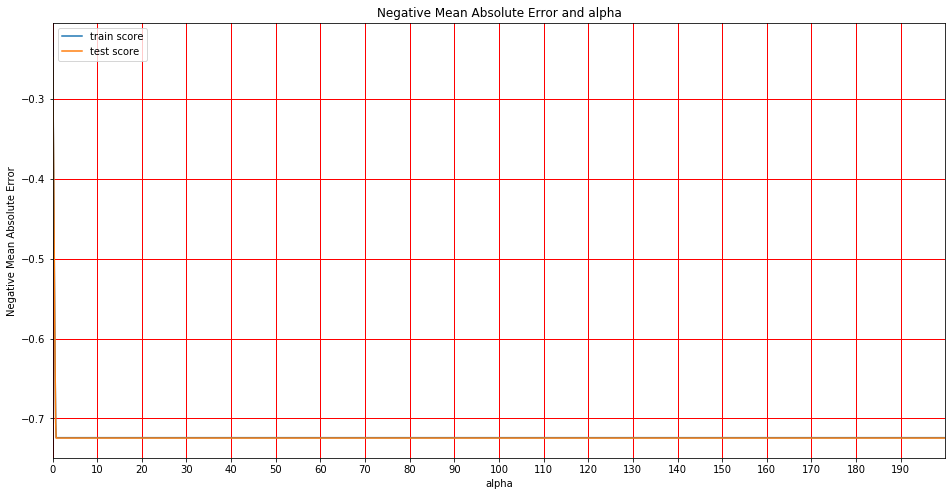

In [117]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [118]:
# Checking the best parameter(Alpha value)
model_lasso_q3.best_params_

{'alpha': 0.001}

In [119]:
alpha_q3 = model_lasso_q3.best_params_['alpha']
lasso_q3 = Lasso(alpha=alpha_q3)   
lasso_q3.fit(X_train_rfe_q3, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
y_train_pred_q3 = lasso_q3.predict(X_train_rfe_q3)
y_test_pred_q3 = lasso_q3.predict(X_test_rfe_q3)

In [121]:
r2_train_q3 = round(r2_score(y_train, y_train_pred_q3),4)
print('Using lasso r2 score for train data: {}'.format(r2_train_q3))
r2_test_q3 = round(r2_score(y_test, y_test_pred_q3),4)
print('Using lasso r2 score for test data: {}'.format(r2_test_q3))

Using lasso r2 score for train data: 0.8911
Using lasso r2 score for test data: 0.7645


In [122]:
# lasso model parameters
model_parameters_q3 = list(lasso_q3.coef_)
model_parameters_q3.insert(0, lasso_q3.intercept_)
model_parameters_q3 = [round(x, 3) for x in model_parameters_q3]
cols_q3 = X_train_rfe_q3.columns
cols_q3 = cols_q3.insert(0, "constant")
sorted(list(zip(cols_q3, model_parameters_q3)),key=lambda x: abs(x[1]),reverse=True)

[('1stFlrSF', 0.261),
 ('YearBuilt_Old', -0.25),
 ('GrLivArea', 0.21),
 ('BsmtExposure_4', 0.205),
 ('2ndFlrSF', 0.199),
 ('Condition2_PosN', -0.172),
 ('KitchenQual_3', 0.147),
 ('BsmtExposure_3', 0.132),
 ('BsmtExposure_1', 0.127),
 ('GarageCars', 0.108),
 ('MasVnrType_Stone', 0.104),
 ('ExterQual_3', 0.099),
 ('Neighborhood_NoRidge', 0.095),
 ('BsmtExposure_2', 0.095),
 ('OverallCond', 0.092),
 ('BldgType_Duplex', -0.092),
 ('BsmtQual_3', 0.083),
 ('Functional_Typ', 0.078),
 ('RoofMatl_WdShngl', 0.076),
 ('MSSubClass', -0.075),
 ('MasVnrType_None', 0.075),
 ('Neighborhood_Crawfor', 0.07),
 ('MasVnrType_BrkFace', 0.063),
 ('GarageFinish_1', -0.025),
 ('GarageFinish_2', -0.011),
 ('constant', 0.0)]

In [123]:
top5_lasso_q3 = [x[0] for x in sorted(list(zip(cols_q3, model_parameters_q3)),key=lambda x: abs(x[1]),reverse=True) if x[0] != 'constant'][:6]
top5_lasso_q3

['1stFlrSF',
 'YearBuilt_Old',
 'GrLivArea',
 'BsmtExposure_4',
 '2ndFlrSF',
 'Condition2_PosN']